# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [165]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alicexu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [166]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [167]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [168]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin AND 2022",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [169]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum AND 2022",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [170]:
# Create the BTC sentiment scores DataFrame
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

btc_sentiments = []
for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text, "date": date, "compound": compound, "positive": pos, "negative": neg, "neutral": neu})
    except AttributeError:
        pass
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame(btc_sentiments) 
btc_df.head()

,text,date,compound,positive,negative,neutral
0,"If you want to pay online, you need to registe...",2022-04-18,0.5719,0.157,0.068,0.775
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882
2,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928
3,"May 5 (Reuters) - Block Inc (SQ.N), the paymen...",2022-05-05,-0.6908,0.000,0.183,0.817
4,Whats happening in the blockchain industry thi...,2022-04-26,0.0000,0.000,0.000,1.000


In [171]:
eth_sentiments = []
for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text, "date": date, "compound": compound, "positive": pos, "negative": neg, "neutral": neu})
    except AttributeError:
        pass
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame(eth_sentiments) 
eth_df.head()



,text,date,compound,positive,negative,neutral
0,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945
1,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879
2,"If you want to pay online, you need to registe...",2022-04-18,0.5719,0.157,0.068,0.775
3,Ethereum is preparing for an upgrade thats bee...,2022-04-26,0.2716,0.065,0.000,0.935
4,Editorial IndependenceWe want to help you make...,2022-05-09,0.6908,0.178,0.000,0.822


In [172]:
# Describe the Bitcoin Sentiment
btc_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.067722,0.070090,0.05140,0.878510
std,0.457196,0.070136,0.06464,0.089831
min,-0.851900,0.000000,0.00000,0.614000
25%,-0.340000,0.000000,0.00000,0.829750
50%,0.000000,0.057000,0.00000,0.885000
75%,0.476700,0.109250,0.07675,0.937500
max,0.865500,0.269000,0.23700,1.000000


In [173]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.091919,0.073040,0.048700,0.878310
std,0.459241,0.076877,0.055628,0.079698
min,-0.790600,0.000000,0.000000,0.684000
25%,-0.296000,0.000000,0.000000,0.831750
50%,0.000000,0.059500,0.044000,0.878500
75%,0.493900,0.109000,0.074250,0.939000
max,0.877900,0.316000,0.234000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: According to the results above, the ethereum had the highest mean positive score of 0.06879

Q: Which coin had the highest compound score?

A: The ethereum had the highest compound score of 0.8779

Q. Which coin had the highest positive score?

A: The highest positive score is from the ethereum coin that was 0.316

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [198]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [199]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
stop_words = stopwords.words('english')


In [200]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    #tokenizer = RegexpTokenizer(r'\w+')
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
     # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(stop_words)]
    return tokens
   # Remove the stop words
    for word in words:
        if word not in stop_words:
            tokens.append(word)

In [201]:
# Create a new tokens column for Bitcoin


In [202]:
# Create a new tokens column for Ethereum


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [203]:
from collections import Counter
from nltk import ngrams


In [204]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(btc_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))

In [208]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(eth_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))

In [209]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [212]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc= Counter(bitcoin_processed).most_common(10)
print(top_10_btc)

[('char', 98), ('bitcoin', 32), ('cryptocurrency', 26), ('crypto', 20), ('ha', 20), ('may', 14), ('market', 12), ('price', 11), ('company', 10), ('year', 10)]


In [213]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = Counter(ethereum_processed).most_common(10)
print(top_10_eth)

[('char', 100), ('ha', 30), ('bitcoin', 26), ('cryptocurrency', 24), ('crypto', 20), ('ethereum', 19), ('price', 17), ('cryptocurrencies', 15), ('nft', 14), ('nfts', 14)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [214]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

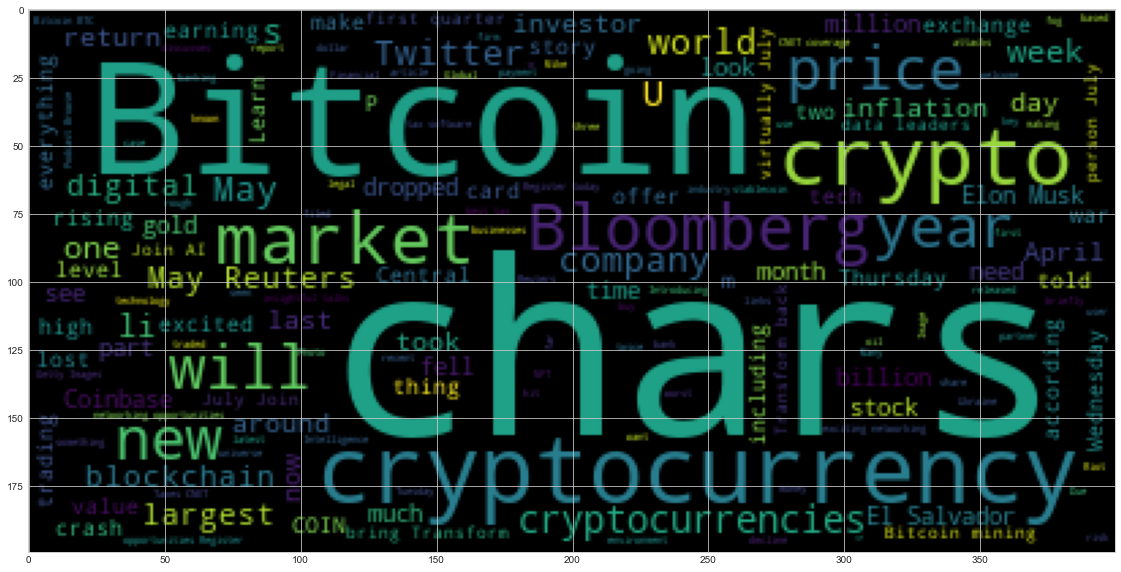

In [215]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

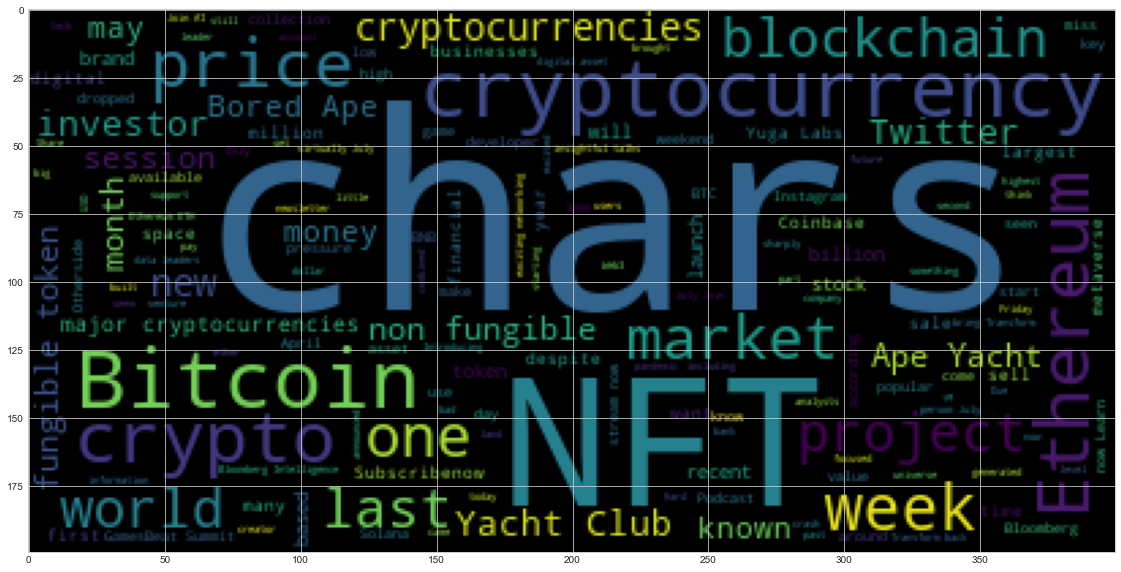

In [216]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [217]:
import spacy
from spacy import displacy

In [218]:
# Download the language model for SpaCy
import matplotlib.pyplot as plt

In [219]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [226]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(btc_df.text)

In [227]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document


In [228]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [229]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents if ent.label_ == 'GPE'])

['Linden', 'Texas', 'LONDON', 'Central African Republic', 'El Salvador', 'Ukraine', 'NEW YORK', 'Miami', 'The City of Miami', 'Lviv', 'Ukraine', 'Poland', 'U.S.', 'Manhattan', 'US', 'El Salvador', 'US', 'Ukraine', 'Bloomberg', 'Mara', 'India', 'the United States', 'El Salvador', 'El Salvador', 'U.S.']


---

### Ethereum NER

In [230]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_df.text)

In [232]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!

In [233]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [234]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents if ent.label_ == 'GPE'])

['Jam City', 'Exchang', 'Untamed Planet', 'North Korea', "Axie Infinity's", 'India', 'Ethereum', 'Blockch', 'DeFi', 'Nvidia']


---